In [ ]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df = df.drop(columns=['P','K','ph'])

In [ ]:
df.head()

,N,temperature,humidity,rainfall,label
0,90,20.879744,82.002744,202.935536,rice
1,85,21.770462,80.319644,226.655537,rice
2,60,23.004459,82.320763,263.964248,rice
3,74,26.491096,80.158363,242.864034,rice
4,78,20.130175,81.604873,262.717340,rice


In [ ]:
df.tail()

,N,temperature,humidity,rainfall,label
2195,107,26.774637,66.413269,177.774507,coffee
2196,99,27.417112,56.636362,127.924610,coffee
2197,118,24.131797,67.225123,173.322839,coffee
2198,117,26.272418,52.127394,127.175293,coffee
2199,104,23.603016,60.396475,140.937041,coffee


In [ ]:
df.shape

(2200, 5)

In [ ]:
df.columns

Index(['N', 'temperature', 'humidity', 'rainfall', 'label'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

N              0
temperature    0
humidity       0
rainfall       0
label          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   temperature  2200 non-null   float64
 2   humidity     2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,N,temperature,humidity,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,25.616244,71.481779,103.463655
std,36.917334,5.063749,22.263812,54.958389
min,0.000000,8.825675,14.258040,20.211267
25%,21.000000,22.769375,60.261953,64.551686
50%,37.000000,25.598693,80.473146,94.867624
75%,84.250000,28.561654,89.948771,124.267508
max,140.000000,43.675493,99.981876,298.560117


In [ ]:
df.nunique()

N               137
temperature    2200
humidity       2200
rainfall       2200
label            22
dtype: int64

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
df_mod = df
df_mod.columns = df_mod.columns
df_mod.head()

# Detection
#IQR
Q1 = np.percentile(df_mod['temperature'],25,interpolation = 'midpoint')
Q3 = np.percentile(df_mod['temperature'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

P1 = np.percentile(df_mod['rainfall'],25,interpolation = 'midpoint')
P3 = np.percentile(df_mod['rainfall'], 75,interpolation = 'midpoint')
IQR2 = P3 - P1

M1 = np.percentile(df_mod['humidity'],25,interpolation = 'midpoint')
M3 = np.percentile(df_mod['humidity'], 75,interpolation = 'midpoint')
IQR3 = M3 - M1

K1 = np.percentile(df_mod['N'],25,interpolation = 'midpoint')
K3 = np.percentile(df_mod['N'], 75,interpolation = 'midpoint')
IQR4 = K3 - K1

print("Old Shape: ", df_mod.shape)

# Upper bound
upper = np.where(df_mod['temperature'] >= (Q3+1.5*IQR))
upper2 = np.where(df_mod['rainfall'] >= (P3+1.5*IQR2))
upper3 = np.where(df_mod['humidity'] >= (M3+1.5*IQR3))
upper4 = np.where(df_mod['N'] >= (M3+1.5*IQR4))
# Lower bound
lower = np.where(df_mod['temperature'] <= (Q1-1.5*IQR))
lower2 = np.where(df_mod['rainfall'] <= (P1-1.5*IQR2))
lower3 = np.where(df_mod['humidity'] <= (M1-1.5*IQR3))
lower4 = np.where(df_mod['N'] <= (M1-1.5*IQR4))

# Removing the Outliers
df_mod.drop(upper[0],inplace = True,errors="ignore")
df_mod.drop(upper2[0], inplace = True,errors="ignore")
df_mod.drop(upper3[0], inplace = True,errors="ignore")
df_mod.drop(upper4[0], inplace = True,errors="ignore")

df_mod.drop(lower[0], inplace = True,errors="ignore")
df_mod.drop(lower2[0], inplace = True,errors="ignore")
df_mod.drop(lower3[0], inplace = True,errors="ignore")
df_mod.drop(lower4[0], inplace = True,errors="ignore")


print("New Shape: ", df_mod.shape)


Old Shape:  (2200, 5)
New Shape:  (1991, 5)


In [ ]:
df = df_mod
df.shape

(1991, 5)

In [ ]:
pip install plotly

In [ ]:
crop_summary_new=df.copy()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
import random
from IPython.core.display import update_display

In [ ]:
df.corr()

,N,temperature,humidity,rainfall
N,1.000000,0.007760,0.200924,-0.001892
temperature,0.007760,1.000000,0.188234,-0.099922
humidity,0.200924,0.188234,1.000000,0.001462
rainfall,-0.001892,-0.099922,0.001462,1.000000


In [ ]:
X=df.drop('label',axis=1)
y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True,random_state=0)

In [ ]:
import lightgbm as lgb
model_LGB = lgb.LGBMClassifier()
model_LGB.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 1393, number of used features: 4
[LightGBM] [Info] Start training from score -2.962549
[LightGBM] [Info] Start training from score -3.019707
[LightGBM] [Info] Start training from score -2.990720
[LightGBM] [Info] Start training from score -3.432552
[LightGBM] [Info] Start training from score -3.112081
[LightGBM] [Info] Start training from score -2.935150
[LightGBM] [Info] Start training from score -2.948756
[LightGBM] [Info] Start training from score -3.455025
[LightGBM] [Info] Start training from score -2.990720
[LightGBM] [Info] Start training from score -3.019707
[LightGBM] [Info] Start training from score -3.019707
[LightGBM] [Info] Start training from score -2.935150
[LightGBM] [Info] Start training from score -2.976535
[LightGBM] [

LGBMClassifier()

In [ ]:
y_pred = model_LGB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score: 0.9281


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       0.64      0.82      0.72        28
      banana       1.00      0.94      0.97        32
   blackgram       0.86      1.00      0.92        30
    chickpea       1.00      0.96      0.98        25
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        26
      cotton       0.93      0.96      0.95        27
      grapes       1.00      0.95      0.98        22
        jute       0.83      1.00      0.91        30
 kidneybeans       0.97      1.00      0.98        32
      lentil       0.94      0.97      0.95        32
       maize       0.96      1.00      0.98        26
       mango       0.91      1.00      0.95        29
   mothbeans       0.96      0.81      0.88        32
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        37
      orange       0.83      0.70      0.76        27
      papaya       1.00    

In [ ]:
X_test[0:1]

,N,temperature,humidity,rainfall
1424,102,28.204808,92.914404,20.360011


In [ ]:
y_test[0:1]

1424    muskmelon
Name: label, dtype: object

In [ ]:
df

,N,temperature,humidity,rainfall,label
0,90,20.879744,82.002744,202.935536,rice
13,93,24.014976,82.056872,185.277339,rice
14,94,25.665852,80.663850,209.586971,rice
17,91,23.793920,80.418180,206.261186,rice
20,89,21.325042,80.474764,185.497473,rice
...,...,...,...,...,...
2195,107,26.774637,66.413269,177.774507,coffee
2196,99,27.417112,56.636362,127.924610,coffee
2197,118,24.131797,67.225123,173.322839,coffee
2198,117,26.272418,52.127394,127.175293,coffee


In [ ]:
a = np.array([[30,30,50,100]])
prediction = model_LGB.predict(a)
print(prediction)

['mango']


# Decision Tree

In [ ]:
features = df[['N','temperature', 'humidity','rainfall']]
target = df['label']
labels = df['label']

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x1 = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x1)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x1*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  82.45614035087719
              precision    recall  f1-score   support

       apple       0.35      1.00      0.52        17
      banana       0.83      0.79      0.81        19
   blackgram       0.72      0.95      0.82        19
    chickpea       0.70      1.00      0.82        14
     coconut       0.89      1.00      0.94        16
      coffee       1.00      1.00      1.00        25
      cotton       0.81      0.96      0.88        23
      grapes       1.00      1.00      1.00        13
        jute       1.00      0.74      0.85        23
 kidneybeans       1.00      0.71      0.83        21
      lentil       0.77      1.00      0.87        17
       maize       0.95      1.00      0.98        21
       mango       0.88      1.00      0.93        14
   mothbeans       1.00      0.45      0.62        22
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.95      1.00      0.98        21
      orange       0.00      0.00

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x2 = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x2)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x2)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.7493734335839599
              precision    recall  f1-score   support

       apple       0.44      0.71      0.55        17
      banana       0.59      0.84      0.70        19
   blackgram       0.68      0.89      0.77        19
    chickpea       0.92      0.79      0.85        14
     coconut       0.84      1.00      0.91        16
      coffee       1.00      0.96      0.98        25
      cotton       0.78      0.91      0.84        23
      grapes       0.62      0.62      0.62        13
        jute       0.78      0.91      0.84        23
 kidneybeans       0.79      0.71      0.75        21
      lentil       0.41      0.41      0.41        17
       maize       0.88      0.33      0.48        21
       mango       0.93      0.93      0.93        14
   mothbeans       0.79      0.68      0.73        22
    mungbean       0.76      0.80      0.78        20
   muskmelon       1.00      1.00      1.00        21
      orange       1.00   

## Accuracy Score

In [ ]:
print("DecisionTree --> ", x1)
print("Logistic Regression -->", x2)
print('LGBM Model -->',accuracy)

DecisionTree -->  0.8245614035087719
Logistic Regression --> 0.7493734335839599
LGBM Model --> 0.9280936454849499


In [ ]:
l = 82
m = 75
n = 93

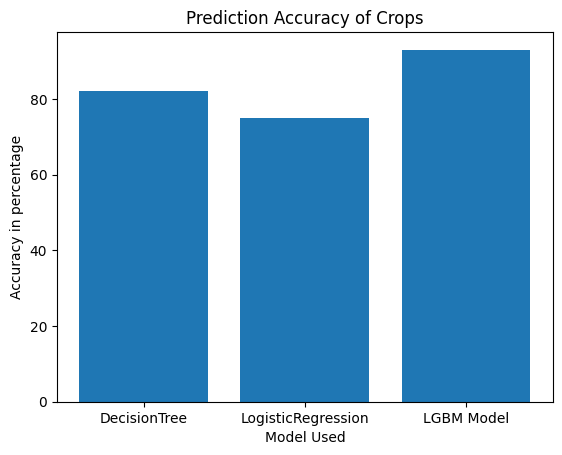

In [ ]:
accuracies = [l,m,n]
models = ['DecisionTree','LogisticRegression','LGBM Model']
# creating the bar plot
plt.bar(models,accuracies)

plt.xlabel("Model Used")
plt.ylabel("Accuracy in percentage")
plt.title("Prediction Accuracy of Crops")
plt.show()


## Making a prediction using LGBM Model

In [ ]:
a = np.array([[30,30,50,100]])
prediction = model_LGB.predict(a)
print(prediction)

['mango']
